In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
%matplotlib inline

In [2]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',\
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data = pd.read_csv('cleveland.csv', names=columns)

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Removing missing values:
The dataset has missing values denoted by **"?"**. We have decided to drop the rows containing the missing values instead of trying to impute them.

### Figuring out which of the columns have missing values

In [4]:
for col in data.columns:
    if '?' in data[col].values.tolist():
        print(col)

ca
thal


### Validating the result

In [5]:
data['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [6]:
data['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

### Size of dataset before dropping the rows

In [7]:
data.shape

(303, 14)

### Dropping the rows with missing values

In [8]:
data = data[data['ca'] != '?']
data = data[data['thal'] != '?']

### Size of dataset after dropping the rows

In [9]:
data.shape

(297, 14)

## Chosen attributes for various data types:

- **Categorical/nominal: num** (diagnosis of heart disease)
- **Ordinal: slope** (the slope of the peak exercise ST segment)
- **Discrete quantitative : age** (age in years) 
- **Continuous quantiative: trestbps** (resting blood pressure)

### Dealing with the predicted attribute:
In the given dataset, the attribute **num** determines if the data point corresponds to a person with heart disease.
**num** has 4 different values associated with it (0, 1, 2, 3, 4). The values greater than 0 each correspond to a type of heart disease. We have decided we would analyze the binary condition, i.e. simply if a person has a heart disease or not. Thus, we are substituiting all zeros with **_normal_** and all values greater than zero with **_disease_** in the **num** attribute.

In [10]:
data['num'] = data['num'].apply(lambda x: 'normal' if x == 0 else 'disease')

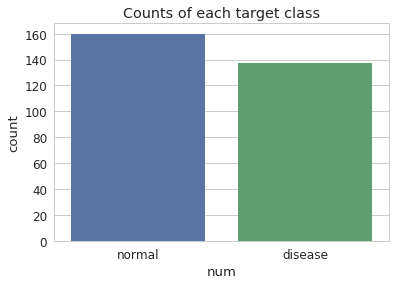

In [11]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
fig = sns.countplot(x="num", data=data)
_ = fig.set_title('Counts of each target class')

### Inference:
The data set is composed by people diagnosed with and without heart disease. The data set has 160 people with <50% of diameter narrowing of blood vessels (without disease) and 137 with some kind of heart disease.

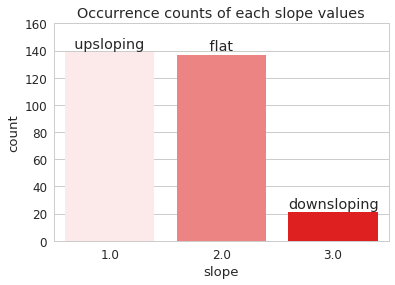

In [12]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
with sns.color_palette(sns.light_palette("red", 3)):
    fig = sns.countplot(x='slope', data=data)
    labels = ['  upsloping  ', '       flat','downsloping']
    for i, p in enumerate(fig.patches):
        fig.annotate('{}'.format(labels[i]), (p.get_x(), p.get_height()+3))
_ = fig.set_title('Occurrence counts of each slope values')
_ = fig.axes.set_ylim(0, 160)

### Inference
Of the total amount of evaluated patients, 139 presented an up sloping pattern at the peak of exercise ST segment, 137 presented a flat pattern and 21 presented a down sloping pattern. 

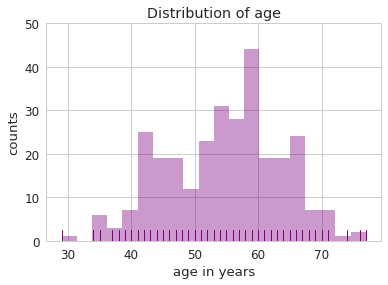

In [13]:
sns.set_style(None)
fig = sns.distplot(data['age'], kde=False, rug=True, bins=20, color='purple')
_ = fig.set_title('Distribution of age')
_ = fig.axes.set_ylim(0, 50)
_ = fig.set_ylabel('counts')
_ = fig.set_xlabel('age in years')

### Inference
The youngest patient that was analyzed was 29 years old, and the oldest 77 years old. The majority of the patients are older than 50 years. There are a high number of patients with age near 40, 60 and 65 years.

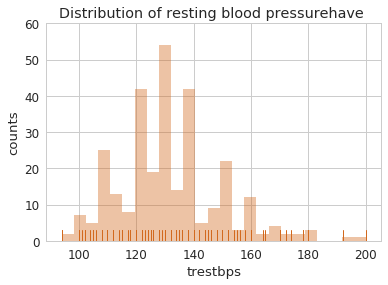

In [14]:
fig = sns.distplot(data['trestbps'], kde=False, rug=True, bins=25, color='chocolate')
_ = fig.axes.set_ylim(0, 60)
_ = fig.set_ylabel('counts')
_ = fig.set_title('Distribution of resting blood pressurehave ')

### Inference
The lowest registered resting blood pressure was 94 mmHg and the highest 200 mmHg. The majority of the patients have a resting blood pressure in the range of 120 mmHg and 140 mmHg.

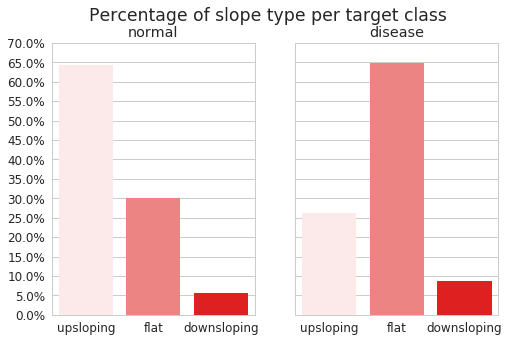

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_size_inches(8, 5)
slope_normal = data[data['num'] == 'normal']['slope']
count_normal = Counter(slope_normal.values)
x = ['upsloping', 'flat', 'downsloping']
y_normal = [count_normal[i] for i in [1.0, 2.0, 3.0]]
y_normal = ((np.array(y_normal) / slope_normal.shape[0]) * 100)

slope_disease = data[data['num'] == 'disease']['slope']
count_disease = Counter(slope_disease.values)
y_disease = [count_disease[i] for i in [1.0, 2.0, 3.0]]
y_disease = ((np.array(y_disease) / slope_disease.shape[0]) * 100)
with sns.color_palette(sns.light_palette("red", 3)):
    sns.barplot(x=x, y=y_normal, ax=ax1)
    sns.barplot(x=x, y=y_disease, ax=ax2)
ax1.set_yticks(np.arange(0, 75, 5))
ax2.set_yticks(np.arange(0, 75, 5))
_ = ax1.set_yticklabels(['{:3.1f}%'.format(x) for x in ax1.get_yticks()])
_ = ax1.set_title('normal')
_ = ax2.set_title('disease')
_ = f.suptitle('Percentage of slope type per target class')

### Inference

The patients that did not present any kind of vessels hypertrophy: 64% exhibit an up sloping pattern, 30% exhibit a flat pattern and 6% exhibit a down sloping pattern. 
In comparison, the patients that did present vessels hypertrophy of any kind: 26% exhibit an up sloping pattern, 65% present a flat pattern and 9% present a down sloping pattern.

There is a substantial reduction in the proportion of up sloping patterns in ST segment from patients diagnosed without heart disease to the ones that were diagnosed with a heart disease. There is also a substantial increase in proportion of patients that present flat/down sloping pattern from patients without heart disease diagnose to the ones that were diagnosed.

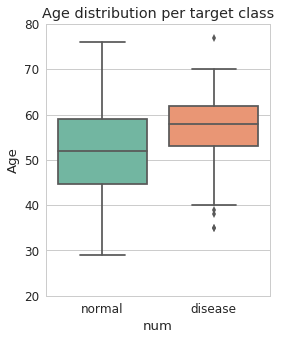

In [16]:
f = plt.figure()
fig = sns.boxplot(x='num', y='age', data=data, palette='Set2')
_ = fig.set_yticks(np.arange(20, 90, 10))
_ = f.add_subplot(fig)
_ = f.set_size_inches(4, 5)
_ = fig.set_xlabel('num')
_ = fig.set_ylabel('Age')
_ = fig.set_title('Age distribution per target class')

### Inference

- The ages of patients diagnosed without heart disease have a median of 52, a minimum of 29 and a maximum of 77 years old.

- The ages of patients diagnosed with heart disease have an median of 58, a minimum of 34 and a maximum of 78 years old.

- The patients without heart disease are distributed in a wider range than the ones that have been diagnosed with a heart disease.

- The patients with heart disease have a higher median age than patients without heart diseases.

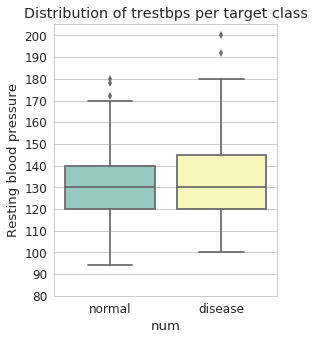

In [17]:
f = plt.figure()
fig = sns.boxplot(x='num', y='trestbps', data=data, palette='Set3')
_ = fig.set_yticks(np.arange(80, 210, 10))
_ = f.add_subplot(fig)
_ = f.set_size_inches(4, 5)
_ = fig.set_xlabel('num')
_ = fig.set_ylabel('Resting blood pressure')
_ = fig.set_title('Distribution of trestbps per target class')

### Inference

- While the median resting blood pressure remains the same for both normal and diseased population, the minimum  and maximum resting blood pressure of the deased population are higher than that of the normal population.

- For the deseased population, most people have a resting blood pressure above the median value which makes this attribute a strong indicator of disease.

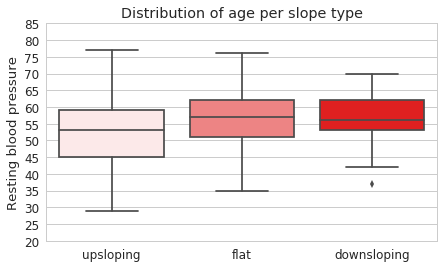

In [18]:
data['named_slope'] = data['slope'].apply(lambda x: 'upsloping' if x == 1 else
                                          'flat' if x == 2 else 'downsloping')
f = plt.figure()
with sns.color_palette(sns.light_palette("red", 3)):
    fig = sns.boxplot(x='named_slope', y='age', data=data, order=['upsloping', 'flat', 'downsloping'])
    _ = fig.set_yticks(np.arange(20, 90, 5))
    _ = f.add_subplot(fig)
    _ = f.set_size_inches(7, 4)
    _ = fig.set_xlabel('')
    _ = fig.set_ylabel('Resting blood pressure')
    _ = fig.set_title('Distribution of age per slope type')

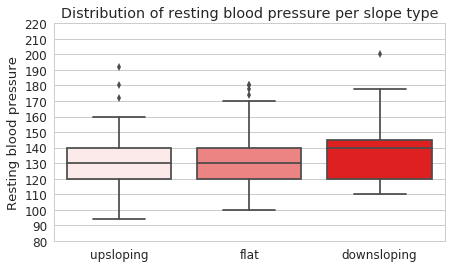

In [19]:
f = plt.figure()
with sns.color_palette(sns.light_palette("red", 3)):
    fig = sns.boxplot(x='named_slope', y='trestbps', data=data, order=['upsloping', 'flat', 'downsloping'])
    _ = fig.set_yticks(np.arange(80, 230, 10))
    _ = f.add_subplot(fig)
    _ = f.set_size_inches(7, 4)
    _ = fig.set_xlabel('')
    _ = fig.set_ylabel('Resting blood pressure')
    _ = fig.set_title('Distribution of resting blood pressure per slope type')

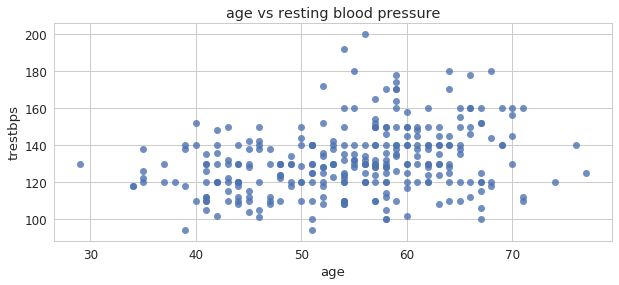

In [20]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
fig = plt.figure()
fig.set_size_inches(10, 4)
f = sns.regplot(x='age', y='trestbps', data=data, fit_reg=False)
_ = f.set_title('age vs resting blood pressure')
_ = fig.add_subplot(f)

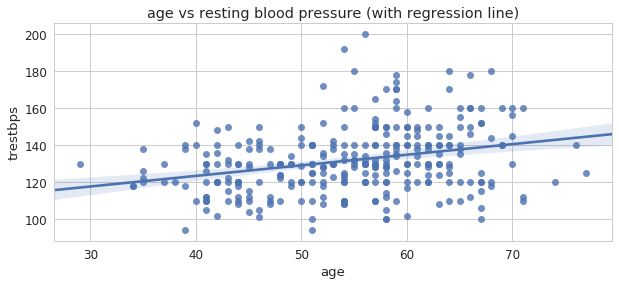

In [21]:
fig = plt.figure()
fig.set_size_inches(10, 4)
f = sns.regplot(x='age', y='trestbps', data=data, fit_reg=True)
_ = f.set_title('age vs resting blood pressure (with regression line)')
_ = fig.add_subplot(f)